### Data Analysis

In [99]:
# import all the libraries needed for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
%matplotlib inline

In [101]:
plt.style.use('ggplot')

In [197]:
# this data has duplications because of language seperated and added as rows
df = pd.read_csv('zocdocnyc_cleaned.csv', index_col = 0) 
df

,Level,Specialties,Gender,Language,Video_Visit,City,Zipcode,Total_Reviews,Overall_Ratings,Wait_Time_Score,Manner_Score,Doc_Urls
Name,,,,,,,,,,,,
"Dr. Rita Aronov, MD",0,Pediatric Doctors,Female,English,False,Brooklyn,11201.0,88.0,4.97,4.67,5.00,https://www.zocdoc.com/doctor/rita-aronov-md-5...
"Dr. Rita Aronov, MD",1,Pediatric Doctors,Female,Russian,False,Brooklyn,11201.0,88.0,4.97,4.67,5.00,https://www.zocdoc.com/doctor/rita-aronov-md-5...
"Dr. Tamir Danilov, DPM",0,Podiatrist,Male,English,False,New York,10002.0,148.0,4.89,4.53,4.90,https://www.zocdoc.com/doctor/tamir-danilov-dp...
"Dr. Tamir Danilov, DPM",1,Podiatrist,Male,Spanish,False,New York,10002.0,148.0,4.89,4.53,4.90,https://www.zocdoc.com/doctor/tamir-danilov-dp...
"Dr. Tamir Danilov, DPM",2,Podiatrist,Male,Russian,False,New York,10002.0,148.0,4.89,4.53,4.90,https://www.zocdoc.com/doctor/tamir-danilov-dp...
...,...,...,...,...,...,...,...,...,...,...,...,...
"Dr. David Berkower, DDS",0,Dentist,Male,English,False,New York,10128.0,3.0,5.00,5.00,5.00,https://www.zocdoc.com/dentist/david-berkower-...
"Dr. David Berkower, DDS",1,Dentist,Male,Spanish,False,New York,10128.0,3.0,5.00,5.00,5.00,https://www.zocdoc.com/dentist/david-berkower-...
"Dr. Yekaterina Kuznetsova, DO",0,General Doctor,Female,English,True,New York,10016.0,1507.0,4.33,4.01,4.38,https://www.zocdoc.com/doctor/yekaterina-kuzne...


In [224]:
sum(df.Gender.isna())

0

In [226]:
sum(df.Language.isna())

103

In [228]:
sum(df.City.isna())

2

In [227]:
sum(df.Zipcode.isna())

724

In [230]:
sum(df.Total_Reviews.isna())

969

In [231]:
sum(df.Wait_Time_Score.isna())

626

In [232]:
sum(df.Overall_Ratings.isna())

590

In [233]:
sum(df.Manner_Score.isna())

626

In [104]:
# def f(row):
#     if row['Zipcode'] >= 10001 or row['Zipcode'] <= 10280:
#         val = 'Manhattan'
#     elif row['Zipcode'] >= 10301 or row['Zipcode'] <= 10314:
#         val = 'Staten Island'
#     elif row['Zipcode'] >= 10451 or row['Zipcode'] <= 10475:
#         val = 'Bronx'
#     elif row['Zipcode'] in [11212, 11213, 11216, 11233, 11238, 11209, 11214, 11228, 11204, 11218, 11219, \
#                             11230, 11234, 11236, 11239, 11223, 11224, 11229, 11235, 11201, 11205, 11215, 11217, 11231, \
#                            11203, 11210, 11225, 11226, 11207, 11208, 11211, 11222, 11220, 11232, 11206, 11221, 11237]:
#         val = 'Brooklyn'
#     elif row['Zipcode'] >= 11101 or row['Zipcode'] <= 11697:
#         val = 'Queens'
#     else:
#         val = np.nan
#     return val
    
# df['Borough'] = df.apply(f, axis=1)

In [144]:
# def f(row):
    
#     if row >= 10001 or row <= 10280:
#         return 'Manhattan'
    
#     elif row >= 10301 or row <= 10314:
#         return 'Staten Island'
        
#     elif row >= 10451 or row <= 10475:
#         return 'Bronx'
        
#     elif row >= 11201 or row <= 11239:
#         return 'Brooklyn'
        
#     elif row >= 11101 or row <= 11697:
#         return 'Queens'
#     else:
#         return np.nan
    
# df['Borough'] = df.Zipcode.apply(f)

In [206]:
df.City = df.City.str.lower()
df.City = df.City.replace('11242', np.nan)
df.City = df.City.replace('828-367-7316', np.nan)
df.City = df.City.replace('brooklyn ny', 'brooklyn')
df.City = df.City.replace('new city', 'new york')
df.City = df.City.replace('new york city', 'new york')
df.City = df.City.replace('ny', 'new york')
set(df.City)

{'albertson',
 'allentown',
 'ardsley',
 'armonk',
 'asheville',
 'astoria',
 'atlantic highlands',
 'baldwin',
 'bayside',
 'bellerose',
 'bellrose',
 'breezy point',
 'briarcliff manor',
 'bronx',
 'brooklyn',
 'cambria heights',
 'carlstadt',
 'cedarhurst',
 'clark',
 'clifton',
 'clinton',
 'college point',
 'deer park',
 'douglaston',
 'east elmhurst',
 'east hampton',
 'east meadow',
 'elmhurst',
 'elmont',
 'elmwood park',
 'englewood',
 'fair lawn',
 'far rockaway',
 'flushing',
 'forest hills',
 'fort lauderdale',
 'fort lee',
 'freeport',
 'fresh meadows',
 'garden city',
 'glen cove',
 'glen oaks',
 'glendale',
 'great neck',
 'greenlawn',
 'greenvale',
 'greenwich',
 'hempstead',
 'hewlett',
 'hicksville',
 'hillsborough township',
 'hoboken',
 'howard beach',
 'huntington',
 'inwood',
 'jackson heights',
 'jamaica',
 'jericho',
 'jersey city',
 'kew gardens',
 'kew gardens hills',
 'larchmont',
 'lawrence',
 'levittown',
 'litchfield',
 'little neck',
 'livingston',
 'long

In [207]:
df0 = df.loc[df['Level'] == 0] # only picked the first row for every level

In [208]:
set(df0.Borough)

{None, 'Queens'}

In [210]:
#df0.info()

In [108]:
# check which rows has at least one nan values

#df[df.isna().any(axis = 1)]

In [213]:
df0[['Total_Reviews', 'Overall_Ratings', 'Wait_Time_Score', 'Manner_Score']].describe()

,Total_Reviews,Overall_Ratings,Wait_Time_Score,Manner_Score
count,3292.000000,3567.000000,3541.000000,3541.000000
mean,189.780984,4.789294,4.552474,4.819226
std,389.013932,0.294904,0.426937,0.253093
min,1.000000,1.000000,1.000000,1.000000
25%,15.000000,4.710000,4.330000,4.750000
50%,61.000000,4.870000,4.670000,4.900000
75%,194.250000,5.000000,4.880000,5.000000
max,6804.000000,5.000000,5.000000,5.000000


In [216]:
# Correlation between the values
pd.DataFrame(df0[['Video_Visit', 'Total_Reviews', 'Overall_Ratings', 'Wait_Time_Score', 'Manner_Score']].\
             corr().unstack().sort_values(ascending = False))

0
Manner_Score    Manner_Score     1.000000
Wait_Time_Score Wait_Time_Score  1.000000
Total_Reviews   Total_Reviews    1.000000
Overall_Ratings Overall_Ratings  1.000000
Video_Visit     Video_Visit      1.000000
Manner_Score    Overall_Ratings  0.883788
Overall_Ratings Manner_Score     0.883788
Manner_Score    Wait_Time_Score  0.543766
Wait_Time_Score Manner_Score     0.543766
                Overall_Ratings  0.534944
Overall_Ratings Wait_Time_Score  0.534944
Video_Visit     Wait_Time_Score  0.098053
Wait_Time_Score Video_Visit      0.098053
Video_Visit     Total_Reviews    0.066225
Total_Reviews   Video_Visit      0.066225
Video_Visit     Manner_Score     0.059573
Manner_Score    Video_Visit      0.059573
Video_Visit     Overall_Ratings  0.059087
Overall_Ratings Video_Visit      0.059087
Total_Reviews   Overall_Ratings -0.088337
Overall_Ratings Total_Reviews   -0.088337
Total_Reviews   Manner_Score    -0.089450
Manner_Score    Total_Reviews   -0.089450
Total_Reviews   Wait_Time_Score -0.120748
Wait_Time_Score Total_Reviews   -0.120748

In [112]:
fig1 = pd.DataFrame(df0.Gender.value_counts())
fig1

,Gender
Male,2092
Female,1908


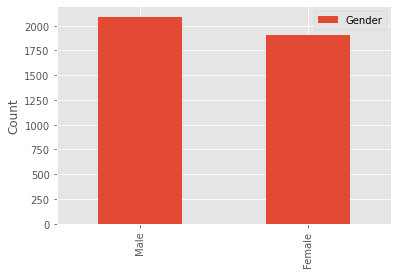

In [113]:
fig1.plot.bar()
plt.ylabel('Count')
plt.show()

In [114]:
fig2 = pd.DataFrame(df0.Specialties.value_counts())


Text(0, 0.5, 'Count')

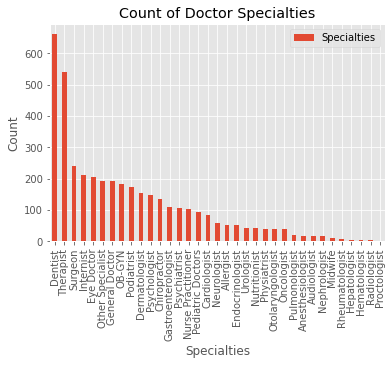

In [245]:
fig2.plot.bar()
plt.title("Count of Doctor Specialties")
plt.xlabel('Specialties')
plt.ylabel('Count')

In [116]:
fig3 = pd.DataFrame(df.Language.value_counts())
#fig3[fig3['Language'] >= 8].drop(index = 'English')

## Languages with value 1 : ['Danish', 'Lithuanian', 'Tibetan', 'Kashmiri', 'American Sign Language',
#        'Xhosa', 'Romani', 'Afrikaans', 'Nepali', 'Amharic', 'Mongolian',
#        'Hausa', 'Norwegian', 'Latvian', 'Tajik', 'Bosnian', 'Yoruba', 'Zulu',
#        'Czech', 'Pashto', 'Assamese', 'Azerbaijani', 'Hiligaynon']


# English = 3972

In [117]:
#fig3[fig3['Language'] < 10]

<Figure size 864x432 with 0 Axes>

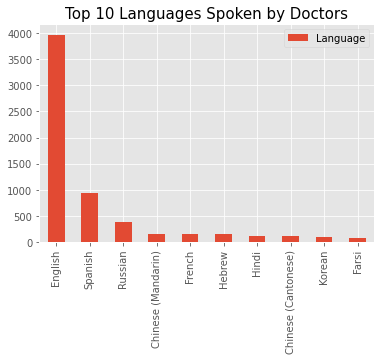

In [264]:
plt.figure(figsize=(12,6))
fig3[fig3['Language'] >= 70].plot.bar().set_title('Top 10 Languages Spoken by Doctors', fontsize = 15)
plt.show()

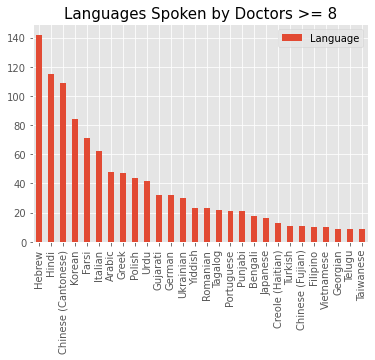

In [119]:
fig3[(fig3['Language'] < 150 ) & (fig3['Language'] >= 8)].plot.bar().set_title('Languages Spoken by Doctors >= 8', fontsize = 15)
plt.show()

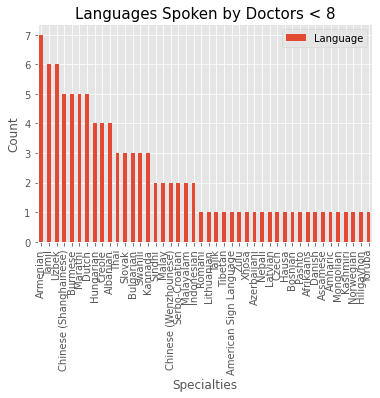

In [120]:
fig3[fig3['Language'] < 8].plot.bar().set_title('Languages Spoken by Doctors < 8', fontsize = 15)
plt.xlabel('Specialties')
plt.ylabel('Count')
plt.show()

In [121]:
fig4 = df0[['Specialties', 'Total_Reviews']].groupby('Specialties').sum().sort_values(by = 'Total_Reviews', ascending=False)

<Figure size 720x432 with 0 Axes>

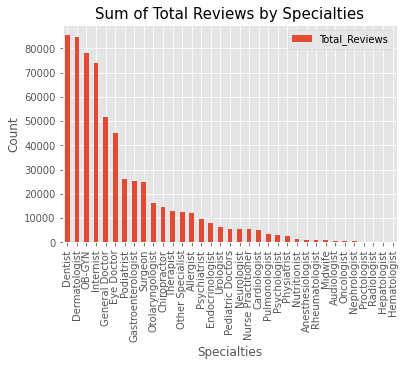

In [122]:
plt.figure(figsize=(10,6))
fig4.plot.bar().set_title('Sum of Total Reviews by Specialties', fontsize=15)
plt.xlabel('Specialties')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Histogram of the Distributionof Wait Time Score')

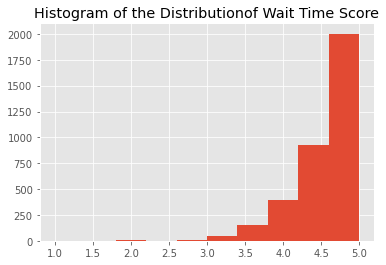

In [258]:
plt.hist(df0.Wait_Time_Score)
plt.title("Histogram of the Wait Time Score Distribution")

Text(0.5, 1.0, 'Histogram of the Manner Score Distribution')

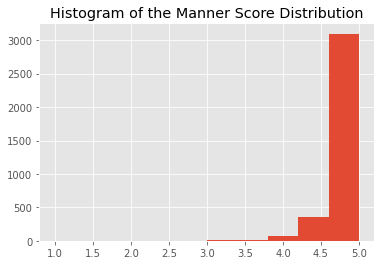

In [265]:
plt.hist(df0.Manner_Score)
plt.title('Histogram of the Manner Score Distribution')

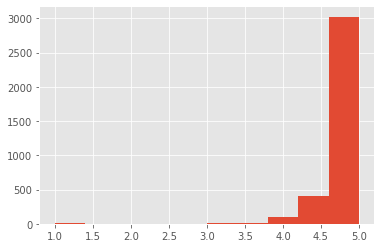

In [266]:
plt.hist(df0.Overall_Ratings)
plt.show('Histogram of Overal Ratings Distribution')

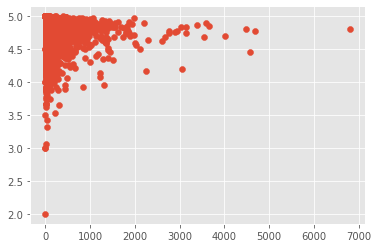

In [126]:
plt.scatter(df0.Total_Reviews, df0.Overall_Ratings)

In [127]:
#df0[['Total_Reviews', 'Overall_Ratings', 'Wait_Time_Score', 'Manner_Score']]

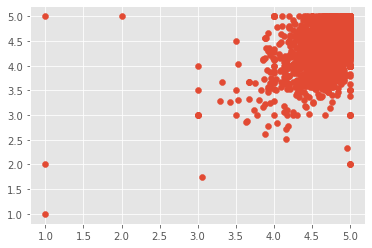

In [128]:
plt.scatter(df0.Overall_Ratings, df0.Wait_Time_Score)

Text(0.5, 1.0, 'Female Doctor Counts by Specialties')

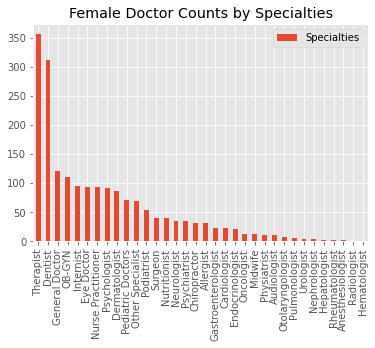

In [267]:
pd.DataFrame(df0.loc[df0['Gender'] == 'Female'].Specialties.value_counts()).plot.bar()
plt.title('Female Doctor Counts by Specialties')

Text(0.5, 1.0, 'Male Doctor Counts by Specialties')

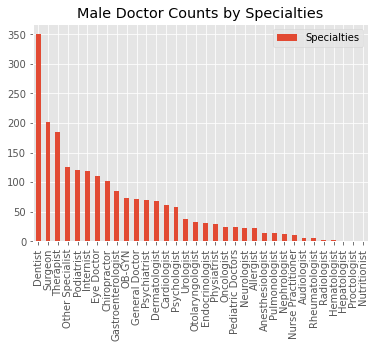

In [268]:
pd.DataFrame(df0.loc[df0['Gender'] == 'Male'].Specialties.value_counts()).plot.bar()
plt.title('Male Doctor Counts by Specialties')

In [340]:
plot1 = pd.DataFrame(df0.loc[df0['Specialties'] == 'Dentist'].City.value_counts(ascending = False)).loc[plot1['City'] >= 5]
plot1

,City
new york,434
brooklyn,88
bronx,15
staten island,12
forest hills,12
jackson heights,7
astoria,7
new rochelle,6
bayside,5
rego park,5


In [338]:
#plot1.plot.bar()

In [343]:
plot2 = pd.DataFrame(df0.loc[df0['Specialties'] == 'Dermatologist'].City.value_counts(ascending = False)).loc[plot2['City'] >= 5]
plot2

,City
new york,108
brooklyn,9
bronx,6


In [345]:
plot3 = pd.DataFrame(df0.loc[df0['Specialties'] == 'OB-GYN'].City.value_counts(ascending = False)).loc[plot3['City'] >= 5]
plot3

,City
new york,117
brooklyn,28
bronx,9
forest hills,5


In [347]:
plot4 = pd.DataFrame(df0.loc[df0['Specialties'] == 'Internist'].City.value_counts(ascending = False)).loc[plot4['City'] >= 5]
plot4

,City
new york,91
brooklyn,50
bronx,14
flushing,10
astoria,6
jackson heights,6


In [349]:
plot5 = pd.DataFrame(df0.loc[df0['Specialties'] == 'General Doctor'].City.value_counts(ascending = False)).loc[plot5['City'] >= 5]
plot5

,City
new york,96
brooklyn,25
bronx,12
forest hills,6


Text(0.5, 1.0, 'Location of Top Cities of Dentists')

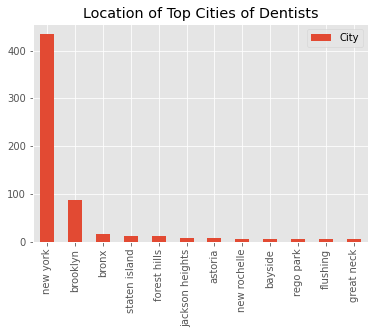

In [358]:
plot1.plot.bar()
plt.title("Location of Top Cities of Dentists")

Text(0.5, 1.0, 'Locations of Top Cities of Dermatologists')

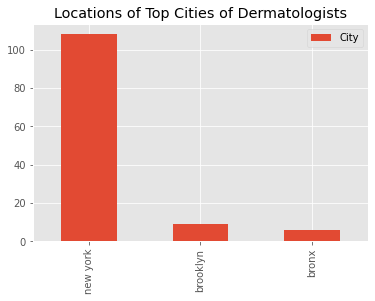

In [359]:
plot2.plot.bar()
plt.title('Locations of Top Cities of Dermatologists')

Text(0.5, 1.0, 'Location of Top Cities of OB-GYN')

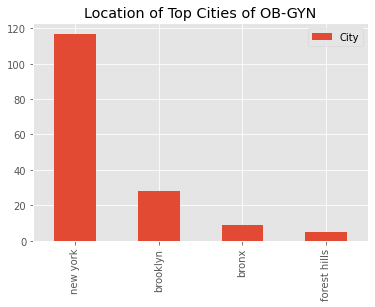

In [360]:
plot3.plot.bar()
plt.title("Location of Top Cities of OB-GYN")

Text(0.5, 1.0, 'Location of Top Cities of Internist')

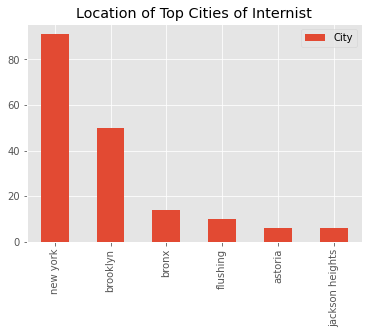

In [361]:
plot4.plot.bar()
plt.title('Location of Top Cities of Internist')

Text(0.5, 1.0, 'Location of Top Cities of General Doctor')

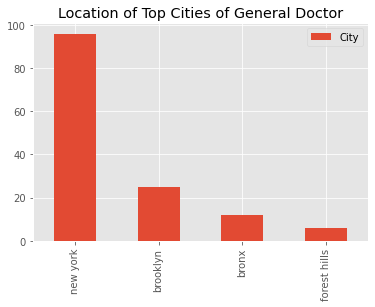

In [362]:
plot5.plot.bar()
plt.title('Location of Top Cities of General Doctor')

In [391]:
plot6 = pd.DataFrame(df0.groupby('Specialties').Video_Visit.value_counts()).reset_index('Specialties').loc[True]
plot6.index = plot6.index.rename('Index Name')
plot6 = plot6.sort_values(by = 'Video_Visit', ascending = False)
plot6 = plot6.set_index('Specialties')

Text(0.5, 1.0, 'Doctors Offering Video Visits')

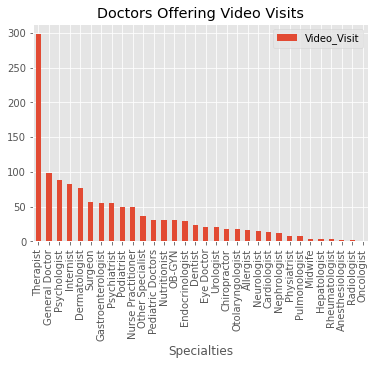

In [393]:
plot6.plot.bar().set_title('Doctors Offering Video Visits')